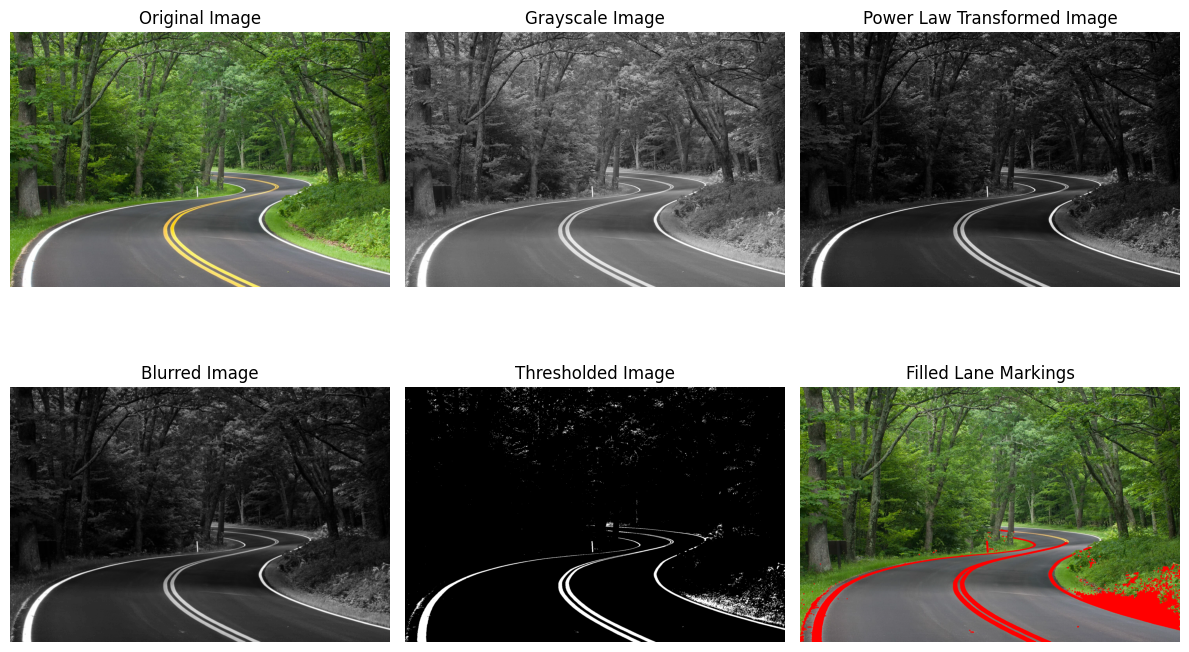

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img):
    height, width=img.shape[:2]
    #Define the "home" shape points
    bottom_left=(0, height)  #bottom left
    bottom_right=(width, height)  #bottom right
    peak=(int(width/2),int(height*0.55))  #peak
    upper_left=(0,int(height*0.7))  #upper left
    upper_right=(width,int(height*0.7))  #upper right

    polygons=np.array([[bottom_left,upper_left,peak,upper_right,bottom_right]],dtype=np.int32)
    #Create a mask initialized to 0 with the same dimensions as the image
    mask=np.zeros((height, width),dtype=np.uint8)
    cv2.fillPoly(mask,polygons,255)
    #do bitwise AND
    masked_image=cv2.bitwise_and(img,img,mask=mask)
    return masked_image

def lane_segmentation(image_path):
    image=cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image.")
        return

    #Step 1: Convert to grayscale
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    #Step 2: Apply power law transform for better road visibility
    c=1
    gamma=2.0
    power_law_transformed=c*(gray/255)**gamma
    power_law_transformed=np.clip(power_law_transformed*255,0,255).astype(np.uint8)

    #Step 3: Apply Gaussian Blur to reduce noise
    blurred=cv2.GaussianBlur(power_law_transformed,(5,5),0)

    #Step 4: Apply binary thresholding to isolate lane markings on power law transformed image
    _,thresholded=cv2.threshold(power_law_transformed,125,255,cv2.THRESH_BINARY)

    #Step 5: Define the region of interest
    roi=region_of_interest(thresholded)

    #Step 6: Morphological operations to enhance lane markings
    kernel=np.ones((5, 5),np.uint8)
    dilated=cv2.dilate(roi,kernel,iterations=1)

    #Step 7: Create a colored output image
    colored_output=image.copy()
    contours,_=cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        color=(0,0,255)  #fix red color
        cv2.fillPoly(colored_output,[contour],color)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(power_law_transformed, cmap='gray')
    plt.title('Power Law Transformed Image')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(colored_output, cv2.COLOR_BGR2RGB))
    plt.title('Filled Lane Markings')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

lane_segmentation('image6.webp')


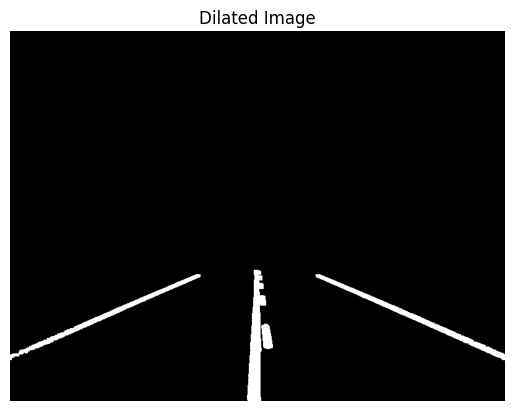

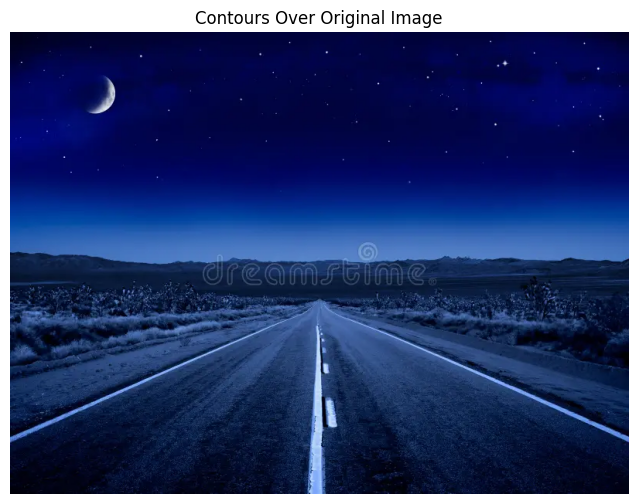

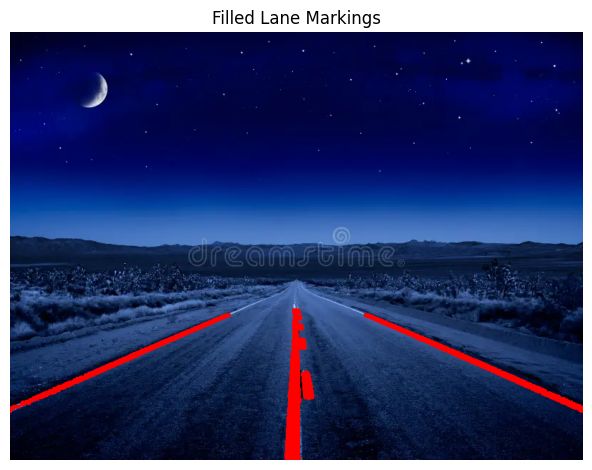

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def region_of_interest(img):
    """Define a polygon mask to isolate the region of interest in the shape of a 'home'."""
    height, width = img.shape[:2]  # get the dimensions of the input image
    
    # Define the "home" shape points
    bottom_left = (0, height)  # bottom left point of the polygon
    bottom_right = (width, height)  # bottom right point of the polygon
    peak = (int(width / 2), int(height * 0.65))  # peak point of the polygon
    upper_left = (0, int(height * 0.7))  # upper left point of the polygon
    upper_right = (width, int(height * 0.7))  # upper right point of the polygon

    # Create a polygon array with these points
    polygons = np.array([[bottom_left, upper_left, peak, upper_right, bottom_right]], dtype=np.int32)

    # Create a mask initialized to black (0) with the same dimensions as the image
    mask = np.zeros((height, width), dtype=np.uint8)

    # Fill the polygon with white (255) for the mask
    cv2.fillPoly(mask, polygons, 255)  # fill the polygon area with white color

    # Apply the mask to the input image using bitwise AND
    masked_image = cv2.bitwise_and(img, img, mask=mask)  # keep only the region of interest

    # plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 5
    # plt.imshow(mask, cmap='gray')  # display the thresholded image
    # plt.title('Region of Interest Mask')  # set the title for the subplot
    # plt.axis('off')  # hide axes
    
    return masked_image  # return the masked image

def lane_segmentation(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)  # read the image from the specified path
    if image is None:  # check if the image is read correctly
        print("Error: Could not read image.")
        return  # exit if image cannot be read

    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert the image from BGR to grayscale

    # Step 2.1: Apply power law transform for better road visibility
    c = 1  # scaling constant
    gamma = 2.0  # exponent for power law transform (set > 1 for brighter and darker effects)
    power_law_transformed = c * (gray / 255) ** gamma  # apply the power law transformation
    power_law_transformed = np.clip(power_law_transformed * 255, 0, 255).astype(np.uint8)  # scale to [0, 255] and convert to uint8

    # Step 3: Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(power_law_transformed, (5, 5), 0)  # apply Gaussian blur with a 5x5 kernel size to smooth the image

    # Step 4: Apply binary thresholding to isolate lane markings on power law transformed image
    _, thresholded = cv2.threshold(power_law_transformed, 70, 255, cv2.THRESH_BINARY)  # apply binary thresholding

    # Step 5: Define the region of interest
    roi = region_of_interest(thresholded)  # isolate the region of interest from the thresholded image

    plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 5
    plt.imshow(roi, cmap='gray')  # display the thresholded image
    plt.title('Region of Interest')  # set the title for the subplot
    plt.axis('off')  # hide axes

    # Step 6: Morphological operations to enhance lane markings
    kernel = np.ones((5, 5), np.uint8)  # create a kernel for morphological operations (5x5 size)
    dilated = cv2.dilate(roi, kernel, iterations=1)  # apply dilation to enhance lane markings

    plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 5
    plt.imshow(dilated, cmap='gray')  # display the thresholded image
    plt.title('Dilated Image')  # set the title for the subplot
    plt.axis('off')  # hide axes

    # Step 7: Create a colored output image
    colored_output = image.copy()  # create a copy of the original image to draw colored lane markings
    
    # Find contours of the dilated image to draw lane markings
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Step 8: Create a copy of the original image to draw contours
    contour_image = image.copy()  # create a copy of the original image to draw contours

    # Draw all contours on the copy of the original image
    for contour in contours:
        cv2.drawContours(colored_output, [contour], -1, (0, 255, 0), 1)  # draw contours in green with thickness 2

    # Step 9: Display the results using a single plot
    plt.figure(figsize=(10, 6))  # set figure size
    plt.subplot(1, 1, 1)  # create a single subplot
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))  # convert BGR to RGB for plotting
    plt.title('Contours Over Original Image')  # set the title for the plot
    plt.axis('off')  # hide axes
    plt.show()  # display the figure

    # Fill contours on the original image with random colors
    for contour in contours:
        # Generate a random color
        color =(0,0,255)  # create a random RGB color
        cv2.fillPoly(colored_output, [contour], color)  # fill the contour area with the random color

    # Step 8: Display the results using subplots
    # plt.figure(figsize=(12, 8))  # create a figure for subplots with specified size

    # plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 1
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # display the original image (convert BGR to RGB for plotting)
    # plt.title('Original Image')  # set the title for the subplot
    # plt.axis('off')  # hide axes

    # plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 2
    # plt.imshow(gray, cmap='gray')  # display the grayscale image
    # plt.title('Grayscale Image')  # set the title for the subplot
    # plt.axis('off')  # hide axes

    plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 3
    plt.imshow(power_law_transformed, cmap='gray')  # display the power law transformed image
    plt.title('Power Law Transformed Image')  # set the title for the subplot
    plt.axis('off')  # hide axes

    # plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 4
    # plt.imshow(blurred, cmap='gray')  # display the blurred image
    # plt.title('Blurred Image')  # set the title for the subplot
    # plt.axis('off')  # hide axes

    # plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 5
    # plt.imshow(thresholded, cmap='gray')  # display the thresholded image
    # plt.title('Thresholded Image')  # set the title for the subplot
    # plt.axis('off')  # hide axes

    plt.subplot(1, 1, 1)  # create a subplot in a 2x3 grid, position 6
    plt.imshow(cv2.cvtColor(colored_output, cv2.COLOR_BGR2RGB))  # display the colored output image
    plt.title('Filled Lane Markings')  # set the title for the subplot
    plt.axis('off')  # hide axes

    plt.tight_layout()  # adjust subplots to fit into the figure area
    plt.show()  # display the figure with all subplots

# Replace 'image1.jpg' with your actual image path
lane_segmentation('image7.webp')  # call the lane segmentation function with the specified image path
